In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_excel(r'C:/Users/Sadhvi/Documents/PY-JUPITER/Minor Project/inputData.xlsx') 
print(df)

   MONTH  Dr. Sachin Kumar
0      1              1294
1      2              1358
2      3              1434
3      4              1489
4      5              1538
5      7              1616


## Splitting The DataSet

In [275]:
month_column = ['MONTH'] 
cita_column = ["Dr. Sachin Kumar"]

# Splitting dataset into testset and trainset
X = df[month_column].values
y = df[cita_column].values
# print(X, y)

# X1 = TrainingSet[:,0:6]
# Y1 = TrainingSet[:,6]

# X_train = X[:4]
# X_test = X[4:]
# print(X_train, X_test)

# y_train = y[:4]
# y_test = y[4:]
# print(y_train)
# print(y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
# print(X_train.shape)
# print(X_test.shape)
# print(X_train)
# print(X_test)

# Random Forest Regressor

In [276]:
#Random Forest model
model_rf = RandomForestRegressor(n_estimators=1000, random_state=42)
model_rf.fit(X_train, y_train.ravel()) 
pred_train_rf= model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)
print(pred_train_rf, pred_test_rf)
trainset_accuracy = r2_score(y_train, pred_train_rf)
testset_accuracy = r2_score(y_test, pred_test_rf)
print(trainset_accuracy)
print(testset_accuracy)

[1340.059 1437.559 1573.286 1460.329] [1340.059 1482.547]
0.910470019261472
0.7903139080246915


# Saving points to a file

In [270]:
# Saving the prediction points to a file 
np.savetxt("trainresults.xlsx", pred_train_rf, delimiter=",")
np.savetxt("testresults.xlsx", pred_test_rf, delimiter=",")

In [271]:
# Taking points from the file
TrainResults = np.genfromtxt("trainresults.xlsx", delimiter=",")
TestResults = np.genfromtxt("testresults.xlsx", delimiter=",")


# Plotting the output

R-Square Value: 0.9003355128542468


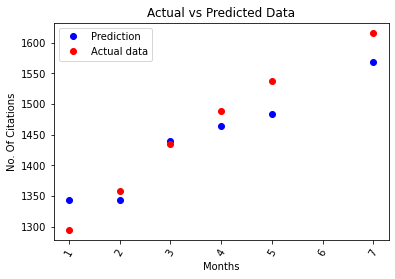

In [272]:
print("R-Square Value:", trainset_accuracy)
plot.plot(X_train,TrainResults, 'bo', label="Prediction")
plot.plot(X_test,TestResults, 'bo')
plot.plot(X, y, 'ro', label ="Actual data")
plot.xticks(rotation = '60'); 
plot.title('Actual vs Predicted Data')
plot.xlabel('Months')
plot.ylabel('No. Of Citations')
plot.legend()